In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [40]:
from PIL import Image
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

In [41]:
import numpy as np
import pandas as pd

### 1. importing data

In [42]:
data = pd.read_csv("Elon_musk.csv",encoding='Latin-1')
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [43]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


### 2. getting data ready

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


### 3. preprocessing and text mining

In [45]:
data['scores'] = data['Text'].apply(lambda Text : sia.polarity_scores(Text))
data.head()

,Text,scores
0,@kunalb11 Im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,@joerogan @Spotify Great interview!,"{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp..."
3,@gtera27 Doge is underestimated,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp..."
4,@teslacn Congratulations Tesla China for amazi...,"{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'comp..."


In [46]:
data['compound'] = data['scores'].apply(lambda scores: scores['compound'])
data.head()

,Text,scores,compound
0,@kunalb11 Im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,@joerogan @Spotify Great interview!,"{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp...",0.6588
3,@gtera27 Doge is underestimated,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",-0.2732
4,@teslacn Congratulations Tesla China for amazi...,"{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'comp...",0.8513


In [47]:
data['compound_score'] = data['compound'].apply(lambda c: 'pos' if c>=0 else 'neg')
data.head()

,Text,scores,compound,compound_score
0,@kunalb11 Im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
2,@joerogan @Spotify Great interview!,"{'neg': 0.0, 'neu': 0.406, 'pos': 0.594, 'comp...",0.6588,pos
3,@gtera27 Doge is underestimated,"{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...",-0.2732,neg
4,@teslacn Congratulations Tesla China for amazi...,"{'neg': 0.0, 'neu': 0.644, 'pos': 0.356, 'comp...",0.8513,pos


#### a) preprocessing

In [48]:
data_list = list(data['Text'])
  
# converting list into string and then joining it with space
tweets = ' '.join(str(e) for e in data_list)

print(tweets)

@kunalb11 Im an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,
All thought he would fail,
Himself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine Its getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923

In [49]:
#removing unwanted symbols incase if exists

ip_twt_string = tweets

ip_twt_string = re.sub("[^A-Za-z]+"," ",ip_twt_string).lower()
ip_twt_string = re.sub("[0-9]+"," ",ip_twt_string)

ip_twt_string

' kunalb i m an alien id aa carmack ray tracing on cyberpunk with hdr is next level have you tried it joerogan spotify great interview gtera doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox https t co wfkmyu oj frodo was the underdoge all thought he would fail himself most of all https t co zgxjfdzzrm owensparks flcnhvy anonyx haha thanks flcnhvy anonyx indeed tweets definitely do not represent real world time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest https t co rwe uhsts geoffkeighley unrealengine it s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy u f u f this is true power haha https t co fc uhqsd o freewalletorg any cr

In [50]:
ip_tweets_words = ip_twt_string.split(" ")                           #making list of ip_twt_string

In [51]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\backpacker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
stop_words = stopwords.words('english')
#stopwords = stop_words.split("\n")

In [53]:
ip_tweets_words = [w for w in ip_tweets_words if not w in stop_words]

In [54]:
ip_twt_string = " ".join(ip_tweets_words)
ip_twt_string

' kunalb alien id aa carmack ray tracing cyberpunk hdr next level tried joerogan spotify great interview gtera doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox https co wfkmyu oj frodo underdoge thought would fail https co zgxjfdzzrm owensparks flcnhvy anonyx haha thanks flcnhvy anonyx indeed tweets definitely represent real world time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest https co rwe uhsts geoffkeighley unrealengine getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u f u f true power haha https co fc uhqsd freewalletorg crypto wallet give private keys avoided costs freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission https co pwt ajtourville yes blkmdl rationaletienne adamklotz pre

#### b) word cloud

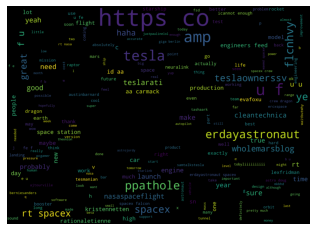

In [55]:
maskarray = np.array(Image.open("butterfly.png"))
cloud = WordCloud(background_color = "black", max_words = 200, mask = maskarray, stopwords = set(STOPWORDS))
cloud

cloud.generate(ip_twt_string)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [56]:
#separating positive words

with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")

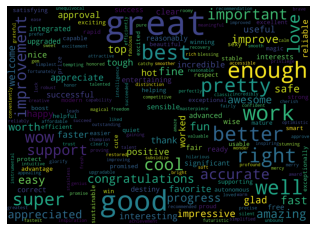

In [57]:
#positive word word cloud
ip_pos_in_pos = " ".join([w for w in ip_tweets_words if w in poswords])

maskarray = np.array(Image.open("butterfly.png"))
cloud = WordCloud(background_color = "black", max_words = 200, mask = maskarray, stopwords = set(STOPWORDS))
cloud

cloud.generate(ip_pos_in_pos)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [58]:
#separating negative words

with open("negative-words.txt","r") as pos:
    negwords = pos.read().split("\n")

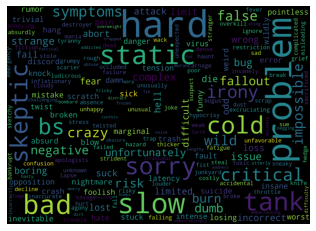

In [59]:
#negative word cloud
ip_neg_in_neg = " ".join([w for w in ip_tweets_words if w in negwords])

maskarray = np.array(Image.open("butterfly.png"))
cloud = WordCloud(background_color = "black", max_words = 200, mask = maskarray, stopwords = set(STOPWORDS))
cloud

cloud.generate(ip_neg_in_neg)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [60]:
len(ip_pos_in_pos)

6295

In [61]:
len(ip_neg_in_neg)

3094

In [62]:
len(ip_tweets_words)

17261